# Supplementary Material for
# Coupling alternative electron pathways with stress response

Nima P. Saadat, Tim Nies, Marvin van Aalst, Brandon Hank, Büsra Demirtas, Oliver Ebenhöh, Anna Matuszyńska

In [1]:
from __future__ import annotations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from scipy.integrate import trapezoid
from tqdm.notebook import tqdm
from modelbase.ode import Simulator
from typing import Iterable, Dict, Tuple, Optional

plt.style.use("./notebook.mplstyle")


def get_new_y0(s):
    return dict(s.get_results_df().iloc[-1])


def test_version():
    import pkg_resources
    from distutils.version import LooseVersion

    version = pkg_resources.get_distribution('modelbase').version
    if not LooseVersion(version) >= LooseVersion("1.3.8"):
        raise ImportError(f"You need modelbase >= 1.3.8 to run this script, got {version}")


def get_minmax(
    s: Simulator, t_end: float
) -> Tuple[pd.Series, pd.Series, pd.Series, pd.Series]:
    c = s.get_full_results_df()
    v = s.get_fluxes_df()

    cmin = c.loc[t_end * 0.75 :, :].min()
    cmax = c.loc[t_end * 0.75 :, :].max()
    vmin = v.loc[t_end * 0.75 :, :].min()
    vmax = v.loc[t_end * 0.75 :, :].max()

    return cmin, cmax, vmin, vmax


def get_avg(s: Simulator, t_end: float) -> Tuple[pd.Series, pd.Series]:
    c = s.get_full_results_df()
    v = s.get_fluxes_df()

    vavg = pd.Series(
        trapezoid(v.loc[t_end * 0.75 :, :], x=v.loc[t_end * 0.75 :, :].index, axis=0)
        / (t_end - v.loc[t_end * 0.75 :, :].index.min()),
        index=v.columns,
    )

    cavg = pd.Series(
        trapezoid(c.loc[t_end * 0.75 :, :], x=c.loc[t_end * 0.75 :, :].index, axis=0)
        / (t_end - v.loc[t_end * 0.75 :, :].index.min()),
        index=c.columns,
    )

    return cavg.T, vavg.T


test_version()

In [2]:
%%capture
cd ..

In [3]:
from models import get_model


In [4]:
%%capture
cd analyses-paper/

In [5]:
y0 = {
    "PQ": 11.027139850905353,
    "PC": 1.8895071932002812,
    "Fd": 3.8690237263896705,
    "ATP": 1.620195002854852,
    "NADPH": 0.4882103700673736,
    "H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,
    "Psbs": 0.9607146039898598,
    "Vx": 0.950783616933656,
    "PGA": 0.9913970817549008,
    "BPGA": 0.0005355311557548053,
    "GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,
    "FBP": 0.006126990841013743,
    "F6P": 0.31166103888161867,
    "G6P": 0.7168203893211117,
    "G1P": 0.041575582577936025,
    "SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,
    "E4P": 0.00732079113061801,
    "X5P": 0.022396849486562384,
    "R5P": 0.03751472214765548,
    "RUBP": 0.13153657267999222,
    "RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,
    "ASC": 9.999994138785292,
    "H2O2": 3.4273920330125316e-06,
    "DHA": 8.513863740903352e-09,
    "GSH": 9.999999991725186,
    "GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,
    "E_inactive": 4.7368421052631575,
}

## MDA steady state concentration in wildtype and MDA reductase mutants
# Supplementary information for Line 152

In [32]:
def plot_ppfd_petc_steady_state(
    v: pd.DataFrame, ax1: Optional[plt.Axes] = None
) -> Tuple[plt.Axes, plt.Axes]:
    if ax1 is None:
        _, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    v["vRuBisCO"].plot(ax=ax1, label="vRuBisCO")
    v["v9"].plot(ax=ax1, label="vSBPase")
    v["vStarch"] .plot(ax=ax1, label="vStarch")
    ax1.set(
        title="photosynthetic electron fluxes",
        xlabel="PPFD/($\mu$mol m$^{-2}$s$^{-1}$)",
        ylabel="mmol e$^-$/mol Chl/s",
    )
    ax1.legend(loc="upper left", borderaxespad=0.5)

    ax2.plot(v["vMehler"], "r--", label="Mehler")
    ax2.plot(v["vPTOX"], "r.", label="PTOX")
    ax2.set(xlabel="PPFD")
    ax2.set_ylabel("mmol e$^-$/mol Chl/s", color="red"),
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.legend(loc="lower right", borderaxespad=0.5)
    return ax1, ax2
def plot_ppfd_petc_steady_state2(
    v: pd.DataFrame, ax1: Optional[plt.Axes] = None
) -> Tuple[plt.Axes, plt.Axes]:
    if ax1 is None:
        _, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    v["vPS1"].plot(ax=ax1, label="rate through PS1")
    (v["vPS2"] * 2).plot(ax=ax1, label="LEF")
    (v["vCyc"] * 2).plot(ax=ax1, label="CEF")
    ax1.set(
        title="photosynthetic electron fluxes",
        xlabel="PPFD/($\mu$mol m$^{-2}$s$^{-1}$)",
        ylabel="mmol e$^-$/mol Chl/s",
    )
    ax1.legend(loc="upper left", borderaxespad=0.5)

    ax2.plot(v["vMehler"], "r--", label="Mehler")
    ax2.plot(v["vPTOX"], "r.", label="PTOX")
    ax2.set(xlabel="PPFD")
    ax2.set_ylabel("mmol e$^-$/mol Chl/s", color="red"),
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.legend(loc="lower right", borderaxespad=0.5)
    return ax1, ax2

def plot_ppfd_redox_steady_state(
    c: pd.DataFrame, ax1: Optional[plt.Axes] = None
) -> Tuple[plt.Axes, plt.Axes]:
    if ax1 is None:
        _, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    c["MDA"].plot(ax=ax1, label="MDA")
    c["DHA"].plot(ax=ax1, label="DHA")
    ax1.set(xlabel="PPFD/($\mu$mol m$^{-2}$s$^{-1}$)", ylabel="Concentration")
    ax1.legend(loc="upper left", borderaxespad=0.25)

    ax2.plot(c["H2O2"], "r--", label="H$_2$O$_2$")
    ax2.set_xlabel("PPFD/($\mu$mol\,m$^{-2}$s$^{-1}$)")
    ax2.set_ylabel("Concentration/mM", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.legend(loc="lower right", borderaxespad=0.5)
    ax1.set_title("MDA, DHA and Hydrogen Peroxide Concentrations")
    return ax1, ax2

In [33]:
s = Simulator(get_model())
s.initialise(y0)
s.update_parameter('kcatMDAR',300*0.01)
c, v = s.parameter_scan_with_fluxes(
    "pfd",
    parameter_values=np.linspace(50, 1500, 50),
    multiprocessing=False,
)

                Windows does not behave well with multiple processes.
                Falling back to threading routine.


  0%|          | 0/50 [00:00<?, ?it/s]

## Steady state system behaviour with a 1% knockdown of the MDa reductase

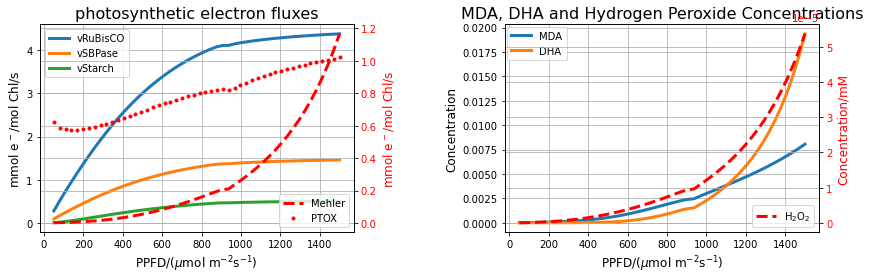

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_ppfd_petc_steady_state(v, ax1)
plot_ppfd_redox_steady_state(c, ax2)
fig.tight_layout(w_pad=5)
plt.show()

In [35]:
s = Simulator(get_model())
s.initialise(y0)
s.update_parameter('kcyc',1)
s.update_parameter('kcatMDAR',300)
c, v = s.parameter_scan_with_fluxes(
    "pfd",
    parameter_values=np.linspace(50, 1500, 50),
    multiprocessing=False,
)


                Windows does not behave well with multiple processes.
                Falling back to threading routine.


  0%|          | 0/50 [00:00<?, ?it/s]

## Steady state system behaviour with in the wildtype

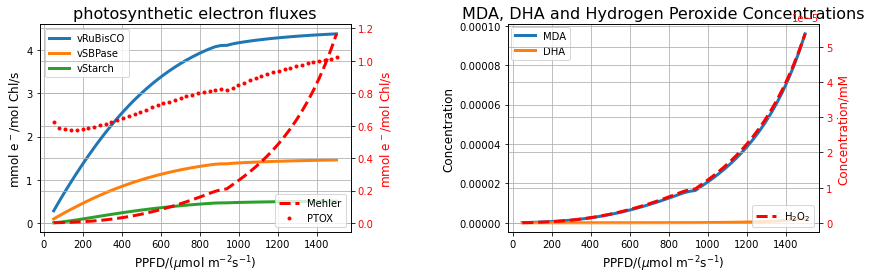

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_ppfd_petc_steady_state(v, ax1)
plot_ppfd_redox_steady_state(c, ax2)
fig.tight_layout(w_pad=5)
plt.show()

In [37]:
s = Simulator(get_model())
s.initialise(y0)
s.update_parameter('kcyc',0.02)
c, v = s.parameter_scan_with_fluxes(
    "pfd",
    parameter_values=np.linspace(50, 1500, 50),
    multiprocessing=False,
)
s.update_parameter('kcyc',1)

                Windows does not behave well with multiple processes.
                Falling back to threading routine.


  0%|          | 0/50 [00:00<?, ?it/s]

## PGR5 knockdown mutants display light saturation at lower light intensities
# Supplementary information for Line 170

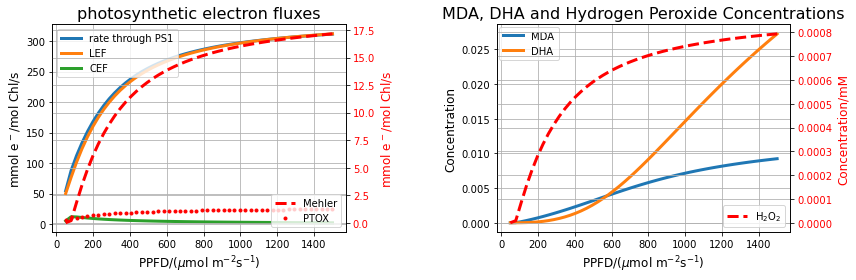

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_ppfd_petc_steady_state2(v, ax1)
plot_ppfd_redox_steady_state(c, ax2)
fig.tight_layout(w_pad=5)
plt.show()

PGR5 Mutants

In [11]:
def par_scan_osc(
    s: Simulator,
    par_name: str,
    par_values: Iterable[float],
    y0: dict[str, float],
    t_end: float = 100_000,
) -> Dict[str, pd.DataFrame]:
    cmin = {}
    cmax = {}
    cavg = {}
    vmin = {}
    vmax = {}
    vavg = {}
    for i, x in tqdm(enumerate(par_values), total=len(par_values)):
        s.initialise(y0)
        s.update_parameter(par_name, x)
        t, y = s.simulate(t_end)
        if t is None:
            all_compounds = s.model.get_all_compounds()
            rate_names = s.model.get_rate_names()
            cmin[x] = dict(zip(all_compounds, np.full(len(all_compounds), np.nan)))
            cmax[x] = dict(zip(all_compounds, np.full(len(all_compounds), np.nan)))
            cavg[x] = dict(zip(all_compounds, np.full(len(all_compounds), np.nan)))
            vmin[x] = dict(zip(rate_names, np.full(len(rate_names), np.nan)))
            vmax[x] = dict(zip(rate_names, np.full(len(rate_names), np.nan)))
            vavg[x] = dict(zip(rate_names, np.full(len(rate_names), np.nan)))
        else:
            cmin[x], cmax[x], vmin[x], vmax[x] = get_minmax(s, t_end)
            cavg[x], vavg[x] = get_avg(s, t_end)
            y0 = get_new_y0(s)
    return {
        "c_min": pd.DataFrame(cmin).T,
        "c_max": pd.DataFrame(cmax).T,
        "v_min": pd.DataFrame(vmin).T,
        "v_max": pd.DataFrame(vmax).T,
        "c_avg": pd.DataFrame(cavg).T,
        "v_avg": pd.DataFrame(vavg).T,
    }


def plot_avg_minmax(
    key: str,
    dfavg: pd.DataFrame,
    dfmin: pd.DataFrame,
    dfmax: pd.DataFrame,
    ax: plt.Axes,
    label: str,
    color: str,
    **plot_kwargs,
):
    dfavg[key].plot(
        ax=ax,
        color=color,
        label=label,
        **plot_kwargs,
    )
    dfmin[key].plot(
        ax=ax,
        style="--",
        color=color,
        label="_" + label,
        linewidth=1,
        **plot_kwargs,
    )
    dfmax[key].plot(
        ax=ax,
        style="--",
        color=color,
        label="_" + label,
        linewidth=1,
        **plot_kwargs,
    )


def plot_pgrl(
    v_avg: pd.DataFrame,
    v_min: pd.DataFrame,
    v_max: pd.DataFrame,
    c_avg: pd.DataFrame,
    c_min: pd.DataFrame,
    c_max: pd.DataFrame,
) -> Tuple[plt.Figure, plt.Axes]:
    fig, axs = plt.subplots(2, figsize=(12, 8), sharex=True)
    ax1, ax2 = axs.ravel()
    ax1b = ax1.twinx()

    plot_avg_minmax("vPS1", v_avg, v_min, v_max, ax1, "rate through PS1", "C0")
    plot_avg_minmax("vPS2", (2 * v_avg), (2 * v_min), (2 * v_max), ax1, "LEF", "C1")
    plot_avg_minmax("vCyc", (2 * v_avg), (2 * v_min), (2 * v_max), ax1, "CEF", "C2")
    #plot_avg_minmax("ATP_norm", c_avg, c_min, c_max, ax2, "ATP", "C0")
    plot_avg_minmax("NADP_redoxstate", c_avg, c_min, c_max, ax2, "NADPH", "C1")
    plot_avg_minmax("vRuBisCO", v_avg, v_min, v_max, ax2, "RuBisCO", "C2")
    plot_avg_minmax("v9", v_avg, v_min, v_max, ax2, "SBPase", "C3")
    plot_avg_minmax("vStarch", v_avg, v_min, v_max, ax2, "vStarch", "C4")

    plot_avg_minmax(
        "H2O2",
        (1000 * c_avg),
        (1000 * c_min),
        (1000 * c_max),
        ax1b,
        "steady state H$_2$O$_2$ concentration",
        "red",
    )

    ax1.set_title("electron flows and H$_2$O$_2$ production")
    ax1.set_ylabel("mmol e$^-$/mol Chl/s")

    ax1b.set_ylabel("H$_2$O$_2$/$\mu$M", color="red")
    ax1b.tick_params(axis="y", labelcolor="red")

    ax2.set_title("redox and energy states")
    ax2.set_xlabel("log$_2$-fold change in PGR5 activity")
    ax2.set_ylabel("fraction of total pool")

    for ax in axs.ravel():
        ax.legend(bbox_to_anchor=(1.2, 1))
    ax1b.legend(bbox_to_anchor=(1.2, 0.8))
    fig.tight_layout()
    return fig, ax

In [12]:
m = get_model()
s = Simulator(m)
s.initialise(y0)
s.update_parameter("pfd", 1000)

NUM_SCANS = 100
MIN_LOG_F = -3.2
MAX_LOG_F = 3.2
xscale = np.linspace(MIN_LOG_F, MAX_LOG_F, NUM_SCANS)
kcyc_vals = m.parameters["kcyc"] * (2 ** xscale)

dfs = par_scan_osc(s, "kcyc", kcyc_vals, y0, t_end=2000)

for k, v in dfs.items():
    dfs[k] = v.set_index(xscale)

  0%|          | 0/100 [00:00<?, ?it/s]

## Steady state system behaviour, including carbon fixation rates, in different PGR5 overexpressions and knockdowns
# Supplementary material for Line 134

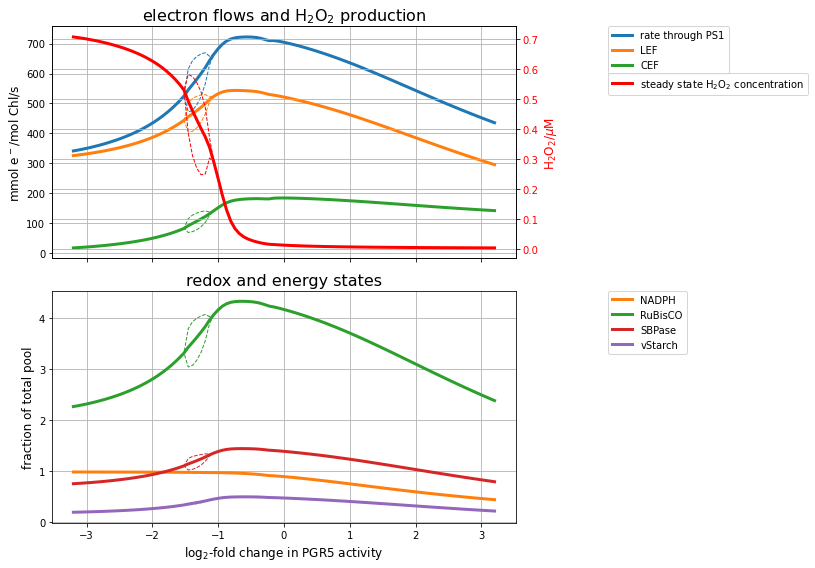

In [13]:
fig, ax = plot_pgrl(
    v_avg=dfs["v_avg"],
    v_min=dfs["v_min"],
    v_max=dfs["v_max"],
    c_avg=dfs["c_avg"],
    c_min=dfs["c_min"],
    c_max=dfs["c_max"],
)

In [44]:
m = get_model()
s = Simulator(m)
s.initialise(y0)
s.update_parameter("pfd", 100)

NUM_SCANS = 100
MIN_LOG_F = -3.2
MAX_LOG_F = 3.2
xscale = np.linspace(MIN_LOG_F, MAX_LOG_F, NUM_SCANS)
kcyc_vals = m.parameters["kcyc"] * (2 ** xscale)

dfs = par_scan_osc(s, "kcyc", kcyc_vals, y0, t_end=2000)

for k, v in dfs.items():
    dfs[k] = v.set_index(xscale)

  0%|          | 0/100 [00:00<?, ?it/s]

## Steady state system behaviour, including carbon fixation rates, in different PGR5 overexpressions and knockdowns for lower light conditions
# Supplementary material for Line 176

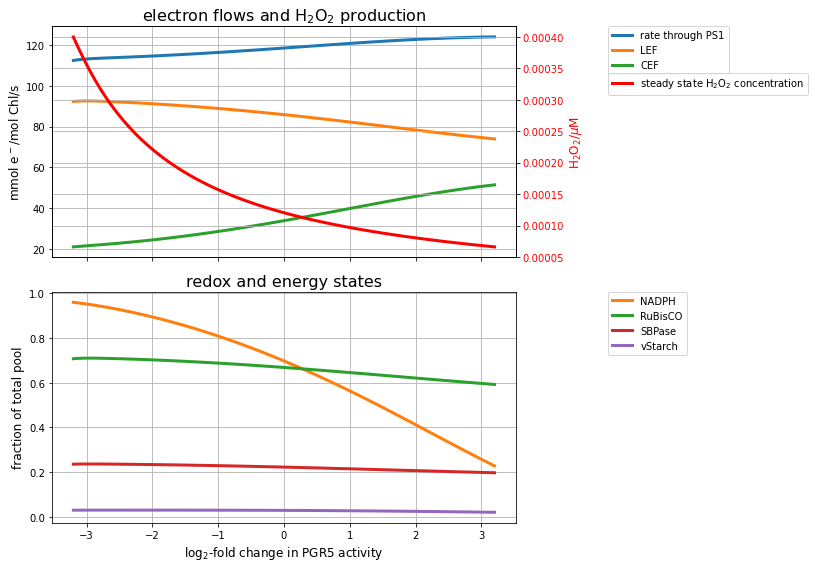

In [45]:
fig, ax = plot_pgrl(
    v_avg=dfs["v_avg"],
    v_min=dfs["v_min"],
    v_max=dfs["v_max"],
    c_avg=dfs["c_avg"],
    c_min=dfs["c_min"],
    c_max=dfs["c_max"],
)